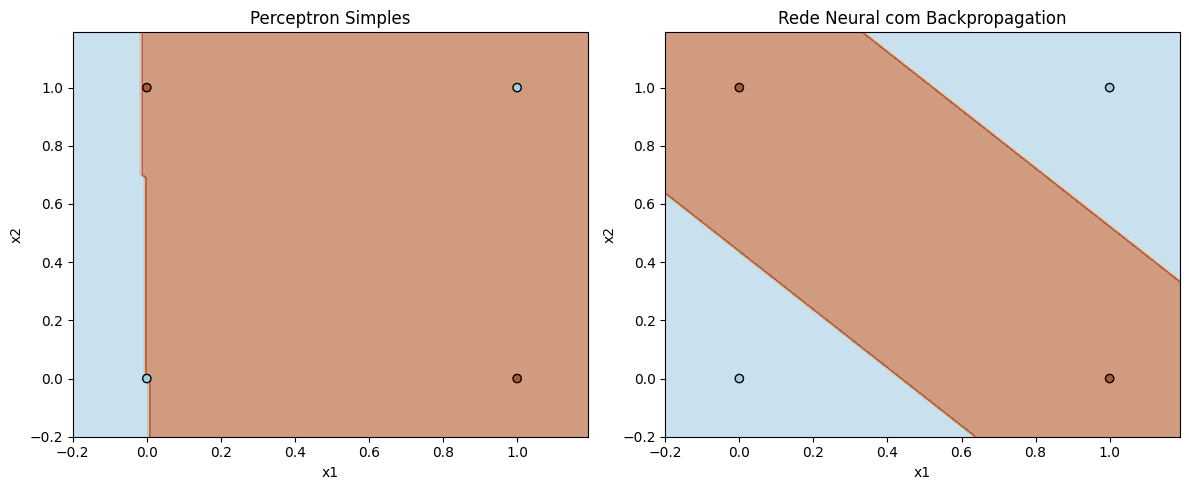

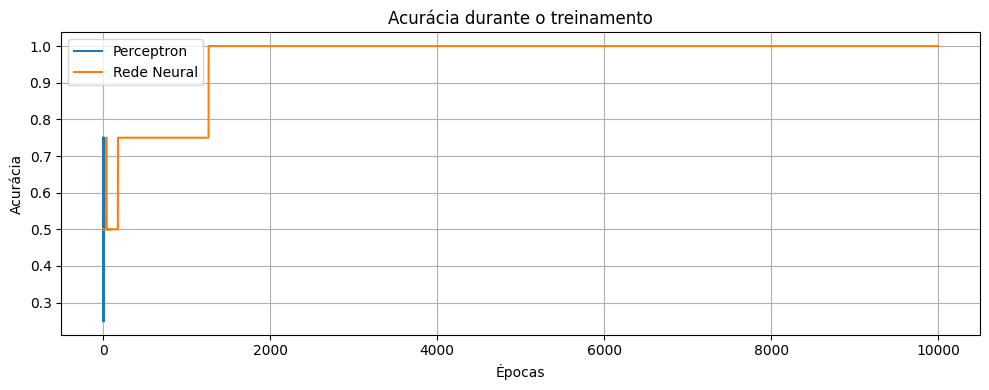

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Dados XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# ----- 1. Perceptron Simples -----
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.W = np.random.randn(input_size, 1)
        self.b = 0
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def train(self, X, y):
        self.accuracies = []
        for _ in range(self.epochs):
            linear_output = X @ self.W + self.b
            y_pred = self.activation(linear_output)
            error = y_pred - y
            self.W -= self.lr * X.T @ error
            self.b -= self.lr * np.sum(error)
            acc = accuracy_score(y, y_pred)
            self.accuracies.append(acc)


    def predict(self, X):
        return self.activation(X @ self.W + self.b)

# ----- 2. Rede Neural com Backpropagation -----
class NeuralNet:
    def __init__(self, input_size, hidden_size=4, lr=0.1, epochs=10000):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def train(self, X, y):
        self.accuracies = []
        for _ in range(self.epochs):
            z1 = X @ self.W1 + self.b1
            a1 = self.sigmoid(z1)
            z2 = a1 @ self.W2 + self.b2
            y_pred = self.sigmoid(z2)

            error = y_pred - y
            dW2 = a1.T @ (error * self.sigmoid_deriv(z2))
            db2 = np.sum(error * self.sigmoid_deriv(z2), axis=0, keepdims=True)
            dz1 = (error @ self.W2.T) * self.sigmoid_deriv(z1)
            dW1 = X.T @ dz1
            db1 = np.sum(dz1, axis=0, keepdims=True)

            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

            preds = (y_pred >= 0.5).astype(int)
            acc = accuracy_score(y, preds)
            self.accuracies.append(acc)


    def predict(self, X):
        z1 = X @ self.W1 + self.b1
        a1 = self.sigmoid(z1)
        z2 = a1 @ self.W2 + self.b2
        y_pred = self.sigmoid(z2)
        return (y_pred >= 0.5).astype(int)

# ----- Plotando as Fronteiras -----
def plot_decision_boundary(model, title, ax):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

# Treinamento
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

nn = NeuralNet(input_size=2)
nn.train(X, y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(perceptron, "Perceptron Simples", axs[0])
plot_decision_boundary(nn, "Rede Neural com Backpropagation", axs[1])
plt.tight_layout()
plt.show()


# Plot da acurácia
plt.figure(figsize=(10, 4))
plt.plot(perceptron.accuracies, label="Perceptron")
plt.plot(nn.accuracies, label="Rede Neural")
plt.title("Acurácia durante o treinamento")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

